<a href="https://colab.research.google.com/github/LuniaKunal/Nifty-Prediction/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [5]:
data = pd.read_csv('dataset.csv')
data.head()

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,3-Jan-00,1482.15,1592.90,1482.15,1592.2
1,NIFTY 50,4-Jan-00,1594.40,1641.95,1594.40,1638.7
2,NIFTY 50,5-Jan-00,1634.55,1635.50,1555.05,1595.8
3,NIFTY 50,6-Jan-00,1595.80,1639.00,1595.80,1617.6
4,NIFTY 50,7-Jan-00,1616.60,1628.25,1597.20,1613.3


In [6]:
ma_100_days = data.Close.rolling(100).mean()

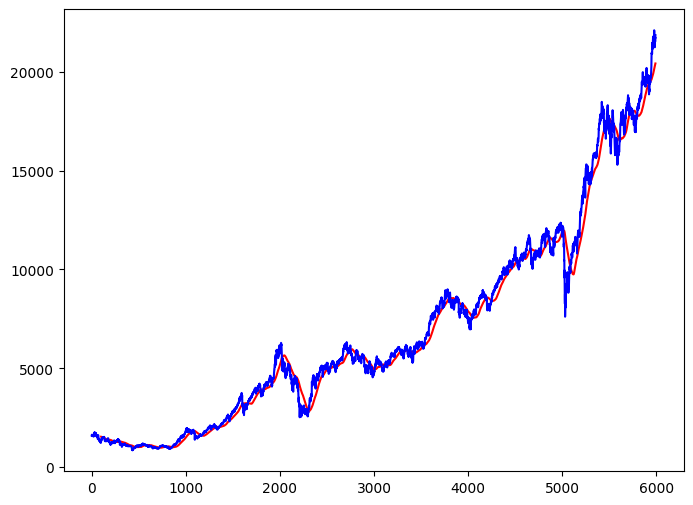

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'b')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

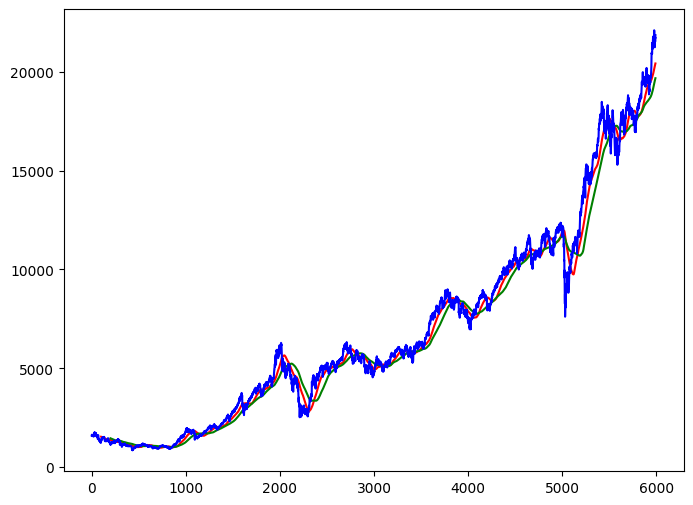

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'g')
plt.plot(data.Close,'b')
plt.show()

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

Index Name    0
Date          0
Open          0
High          0
Low           0
Close         0
dtype: int64

In [16]:
dataset.duplicated().sum()

0

In [3]:
# data_train = data.Close[0: int(len(data)*80)]
# data_test = data.Close[int(len(data)*80),len(data)]


Index Name    0
Date          0
Open          0
High          0
Low           0
Close         0
dtype: int64

In [28]:
# x = dataset.iloc[:,2:5]
y = data.iloc[:,5:6]
data_train = y[0: int(len(data)*0.80)]
data_test = y[int(len(data)*0.80): len(data)]

(1199, 1)

In [30]:
print("data_train shape :: ",data_train.shape)
print("data_test shape :: ",data_test.shape)


data_train shape ::  (4793, 1)
data_test shape ::  (1199, 1)


In [31]:
# freature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
data_train_scale = scaler.fit_transform(data_train)

In [34]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i, 0])
# print(x, y)

In [37]:
x,y = np.array(x), np.array(y)

In [40]:
!pip install tensorflow

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [42]:
model = Sequential()

model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [47]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [48]:
model.fit(x,y, epochs = 50, batch_size = 32,verbose = 1)

Epoch 1/50
147/147 [==============================] - 49s 292ms/step - loss: 0.0191
Epoch 2/50
147/147 [==============================] - 43s 293ms/step - loss: 0.0055
Epoch 3/50
147/147 [==============================] - 42s 286ms/step - loss: 0.0050
Epoch 4/50
147/147 [==============================] - 42s 285ms/step - loss: 0.0041
Epoch 5/50
147/147 [==============================] - 43s 294ms/step - loss: 0.0042
Epoch 6/50
147/147 [==============================] - 42s 286ms/step - loss: 0.0039
Epoch 7/50
147/147 [==============================] - 43s 290ms/step - loss: 0.0033
Epoch 8/50
147/147 [==============================] - 42s 288ms/step - loss: 0.0031
Epoch 9/50
147/147 [==============================] - 42s 287ms/step - loss: 0.0031
Epoch 10/50
147/147 [==============================] - 43s 295ms/step - loss: 0.0029
Epoch 11/50
147/147 [==============================] - 42s 287ms/step - loss: 0.0029
Epoch 12/50
147/147 [==============================] - 42s 286ms/step - lo

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [51]:
past_100_days = data_train.tail(100)

In [52]:
data_test = pd.concat([past_100_days, data_test],ignore_index = True)

In [53]:
data_test

,Close
0,10598.40
1,10585.20
2,10482.20
3,10582.50
4,10576.30
...,...
1294,21737.60
1295,21522.10
1296,21725.70
1297,21697.45


In [55]:
data_test_scale = scaler.fit_transform(data_test)

In [56]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i, 0])
x,y = np.array(x), np.array(y)

In [57]:
y_predict = model.predict(x)

38/38 [==============================] - 5s 113ms/step


In [58]:
y_predict

array([[0.27772832],
       [0.27896306],
       [0.28016546],
       ...,
       [0.93352723],
       [0.93301606],
       [0.93288475]], dtype=float32)

In [60]:
# scaler.scale_
scale = 1/scaler.scale_

In [61]:
y_predict = y_predict*scale

In [62]:
y = y*scale

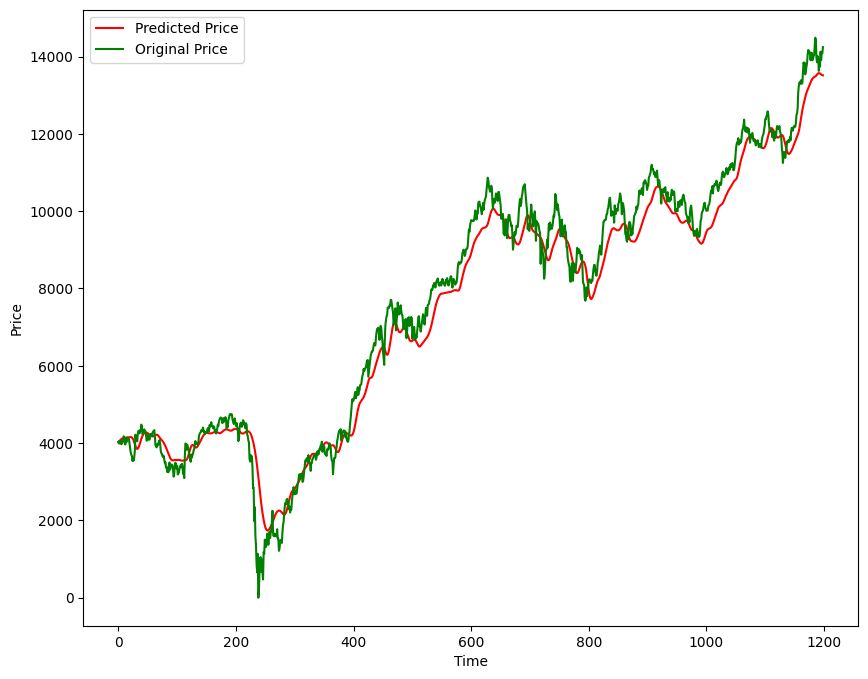

In [66]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [65]:
model.save('Nifty Pridection Model.keras')